In [1]:
import os
import sys

# add the directory containing the notebook to Python path
sys.path.append(os.getcwd())

import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

HW2 Problem (5) - example plots

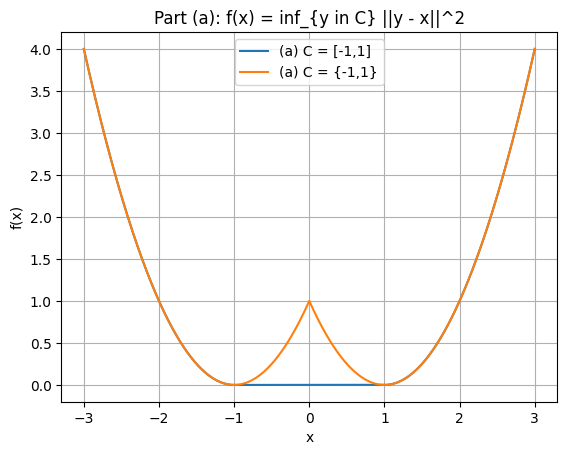

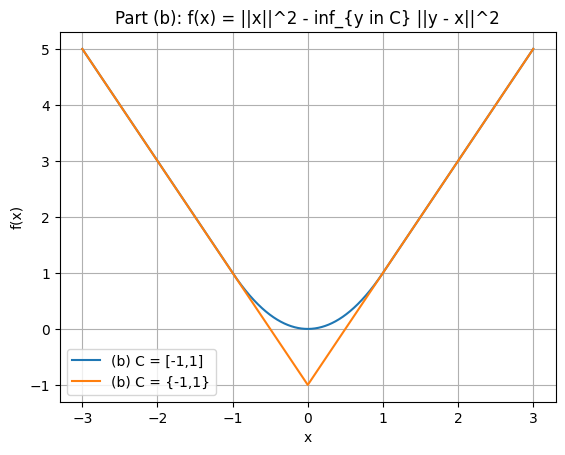

In [2]:
# Define the range of x values
x = np.linspace(-3, 3, 2001)

dist2_interval = np.where(np.abs(x) <= 1, 0.0, (np.abs(x) - 1.0)**2)

fB_interval = x**2 - dist2_interval

dist2_twopoint = np.minimum((x + 1.0)**2, (x - 1.0)**2)

fB_twopoint = x**2 - dist2_twopoint

# (A)
plt.figure()
plt.plot(x, dist2_interval, label="(a) C = [-1,1]")
plt.plot(x, dist2_twopoint, label="(a) C = {-1,1}")
plt.title("Part (a): f(x) = inf_{y in C} ||y - x||^2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)

#(B)
plt.figure()
plt.plot(x, fB_interval, label="(b) C = [-1,1]")
plt.plot(x, fB_twopoint, label="(b) C = {-1,1}")
plt.title("Part (b): f(x) = ||x||^2 - inf_{y in C} ||y - x||^2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)

plt.show()


HW Problem (7) - A4.16

status: optimal
optimal value (fuel): 17.323672551918925


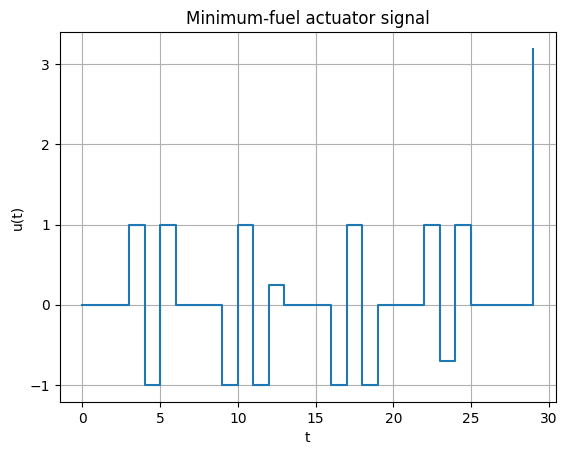

In [6]:
# Load the instance in A4.6
A = np.array([[-1.0, 0.4, 0.8],
              [ 1.0, 0.0, 0.0],
              [ 0.0, 1.0, 0.0]])
b = np.array([1.0, 0.0, 0.3])         
xdes = np.array([7.0, 2.0, -6.0])      
N = 30              

n = A.shape[0]   # state dimension

x = cp.Variable((n, N + 1))   
u = cp.Variable(N)           

# Constraints
constraints = [x[:, 0] == np.zeros(n), #x(:,0) = [0;0;0]
               x[:, N] == xdes] #x(:,N) = xdes

for t in range(N):
    constraints += [x[:, t+1] == A @ x[:, t] + b * u[t]] #x(:,t+1) = A*x(:,t) + b*u(t)

#  f(a) = |a| if |a|<=1 else 2|a|-1, equivalently f(a) = |a| + pos(|a|-1)
absu = cp.abs(u)
fuel = cp.sum(absu + cp.pos(absu - 1))

objective = cp.Minimize(fuel)

# Solve
prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.SCS)   

print("status:", prob.status)
print("optimal value (fuel):", prob.value)

# Plot u(t)
tgrid = np.arange(N)
plt.figure()
plt.step(tgrid, u.value, where="post")
plt.xlabel("t")
plt.ylabel("u(t)")
plt.title("Minimum-fuel actuator signal")
plt.grid(True)
plt.show()
